# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import datetime

In [29]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
622,623,15-09-2019,autumn,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
425,426,02-03-2019,spring,1,3,0,5,1,2,14.486653,17.99210,65.7083,9.708568,246,2948,3194
64,65,06-03-2018,spring,0,3,0,0,0,2,15.437402,18.31260,94.8261,23.000229,114,491,605
255,256,13-09-2018,autumn,0,9,0,2,1,1,26.684153,30.17770,71.2500,9.500868,701,4062,4763
538,539,23-06-2019,autumn,1,6,0,6,0,1,29.998347,32.63960,53.4583,12.041307,2657,4801,7458
46,47,16-02-2018,spring,0,2,0,3,1,1,13.048701,15.81000,42.3478,16.869997,218,1897,2115


---------

# COLUMNA DTEDAY

### separando la col DTime en day, month, year

In [35]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [36]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [37]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [38]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

In [39]:
df_bike["day"].dtypes

dtype('O')

In [40]:
df_bike["day"] =df_bike["day"].astype("int64")

In [41]:
df_bike["day"].dtypes

dtype('int64')

In [42]:
df_bike.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [43]:
df_bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [44]:
df_bike.stb.counts().T

,workingday,yr,holiday,weathersit,season,weekday,mnth,day,temp,hum,casual,windspeed,registered,atemp,cnt,dteday,instant
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
unique,2,2,2,3,4,7,12,31,498,594,605,649,678,689,695,730,730
most_freq,1,0,0,1,autumn,6,1,1,26.035,61.3333,120,9.041918,4841,32.7344,5409,01-01-2018,1
most_freq_count,499,365,709,463,188,105,62,24,5,4,4,3,3,4,2,1,1
least_freq,0,0,1,3,winter,3,2,31,10.865,79.7083,2290,4.417256,3100,26.3571,5740,01-01-2018,1
least_freq_count,231,365,21,21,178,103,56,14,1,1,1,1,1,1,1,1,1


------

# COLUMNA SEASON

# Corregir columna season

In [48]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [49]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [50]:
df_bike['season_2'] = df_bike['dteday'].apply(meses)

In [51]:
df_bike.sample(5)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
293,294,2018-10-21,winter,0,10,21,0,5,1,1,17.527500,21.17980,57.4167,14.833532,676,3628,4304,autumn
533,534,2019-06-18,summer,1,6,18,0,1,1,2,23.301653,27.24210,77.7917,11.707982,653,4446,5099,spring
375,376,2019-11-01,spring,1,1,11,0,3,1,2,11.240847,14.14105,84.7500,8.791807,92,2085,2177,autumn
527,528,2019-12-06,summer,1,6,12,0,2,1,2,26.786653,29.89375,83.3333,14.374582,477,4495,4972,autumn
220,221,2018-09-08,autumn,0,8,9,0,2,1,1,31.775000,36.20605,57.0417,10.125107,907,3695,4602,summer


Ahora que la columna season ha sido corregida, ¿qué hacemos con la columna original? ¿La eliminamos? 
 - Antes de codificarla hacemos una gráfica para ver cómo se reparte el alquiler de bicicletas durante las estaciones.

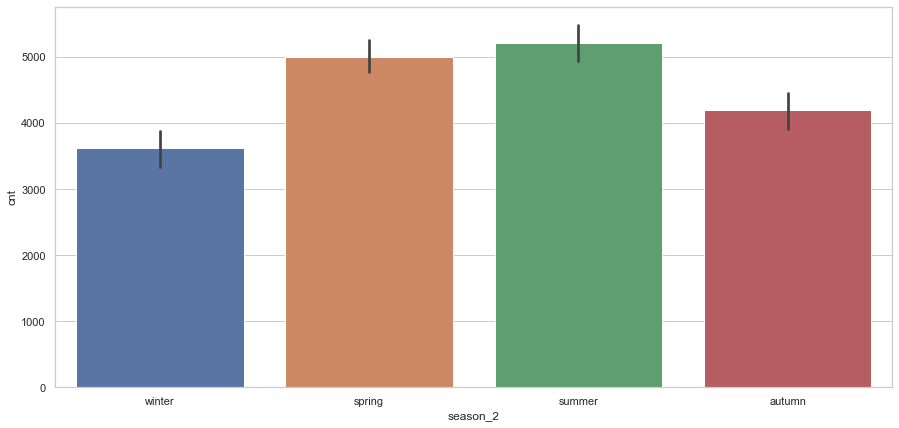

In [52]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="cnt", data=df_bike)

### ¿Cuantas reservas se hacen pos season y por tipo de cliente?

In [ ]:
x= df_bike.groupby(['season']).agg({'cnt': ['sum'],'casual': ['sum'],'registered': ['sum']}).stb.subtotal()
x

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(data=df_bike, x="cnt",y="season",ax=axes[0])
sns.histplot(data=df_bike, x="casual",y="season",ax=axes[1])
sns.histplot(data=df_bike, x="registered",y="season",ax=axes[2])

#HAY MAS RESERVAS DE GENTE REGISTRADA QUE CASUAL

--------

# COLUMNA YEAR

QUE HA PASADO AQUI . ¿QUE AÑO SE HA RESERVADO MÁS 2018 0 2019?

----

# COLUMNA MONTH

QUE MESES INFLUYEN MAS A LAS RESERVAS

----

# COLUMNA HOLIDAY : 1 = festivo /  0 = no festivo

    HAY MAYOR NUMERO DE RESERVAS LOS NO FESTIVOS

    RESERVAS GENERALES: 
        MAX  registrados reservan mas NO festivos DESTACA
        MIN los que menos reservan son CASUALES tanto festivo como no festivo

        SUMA EN NO FESTIVO
            REGISTRADOS 2.614.817 RESERVAS EN NO FESTIVO
            CASUAL 597.593 RESERVAS EN NO FESTIVO

        SUMA EN FESTIVO
            REGISTRADOS 56.076 RESERVAS EN  FESTIVO
            CASUAL 22.359 RESERVAS EN NO FESTIVO

df_bike.groupby(["holiday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# hay mas número de reservas en dias NO festivos

In [ ]:
sns.countplot(x='holiday', data=df_bike)

-----

# COLUMNA weekday: 
### 1- LUNES 2-MARTES  3-MIERCOLES  4- JUEVES  5-VIERNES 6-SÁBADO  0 -DOMINGO 

     Hay bastante igualdad entre los dias de la semana, siendo el ranking de más a menos reservas:
     ORDEN DE DIAS POR RESERVA: Viernes, jueves,sabado, miercoles,martes,lunes y domingo.


In [ ]:
df_bike.groupby(["weekday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sbn.boxplot(data=df_bike, x='weekday', y='casual',ax=axes[0])
sbn.boxplot(data=df_bike, x='weekday', y='registered',ax=axes[1])

----

# COLUMNA workingday :  1 - LABORABLE  /  0 -FIN DE SEMANA

In [ ]:
df_bike.groupby(["workingday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# 1 dia laborable - hay muchas mas reservas en días laborables que festivos, mas de el doble.

---

# COLUMNA weathersit: GRADOS 

---

# COLUMNA TEMPERATURA

hay que hacer encoding con etiquetas para las graficas

---

# COLUMNA HUMEDAD

hay que hacer encoding con etiquetas para las graficas

---

# Tabla viento: encoding

In [57]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [59]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('object')

 - Al utilizar el método pd.cut nos devuelve una columna categórica, por eso lo cambiamos a tipo int64. Ahora ya tenemos codificada esta columna.

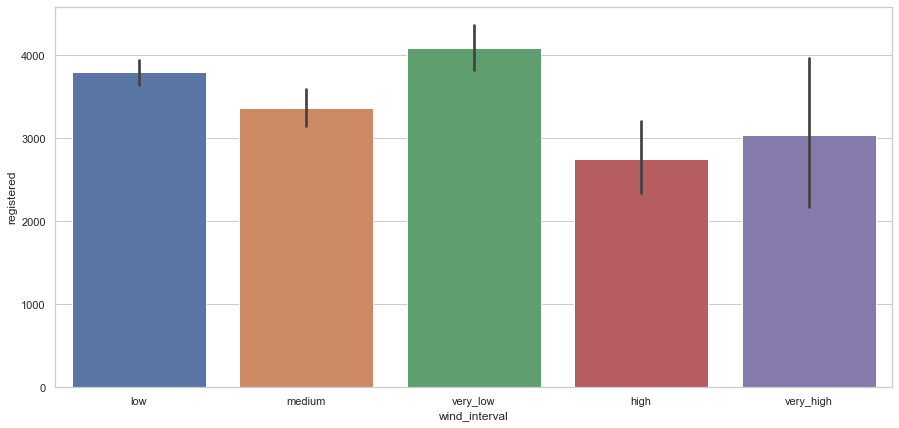

In [60]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="wind_interval", y="registered", data=df_bike)

----

Explicamos de que van nuestras columnas:

COLUMNAS:

- **Holiday** : 1 = festivo / 0 = no festivo
- **Weekday** = 0 Domingo - 6 Sábado
- **Workingday** = 1 laborable / 0 finde
- **Weathersit** = grados en el readme
- **Temperatura** = 
- **Humedad** =
- **Viento** = 
- **Casual** = nº de usuarios no registrados/día
- **Registered** = nº de usuarios registrados/día
- **Total** = total de usuarios/día


# ANTES DE ESTE PROCESO, DEBERÍAN ESTAR LAS COLUMNAS CON ENCODING CREADAS, Y HABER EXAMINADO CON GRAFICAS Y TAL

ELiminar las columnas

Una vez eliminadas las columnas : "dtday", "season" sin modificar , "instant" y "atemp"

In [ ]:
df.drop(["","",""], axis=1, inplace=True)

¿Están todas como deberian? Object, float, ....etc? Si no es asi es momento de cambiarlo.

df.dtypes()

Reordenar a preferencia  o más rapida lectura o entendimiento

In [ ]:
df_bike=df_bike.reindex(columns=[ 'yr', 'mnth','day', 'holiday', 'weekday',
                                'workingday', 'weathersit', 'temp', 'atemp', 'hum', 
                                'windspeed', 'casual', 'registered', 'cnt'])

Renombrar las columnas:

In [ ]:
df.rename(columns= {"edad":"edad",...},inplace=True)

Hacer un describe

In [ ]:
pd.set_option("display.float_format",lambda x: "%3.f" %x) #Usamos esta linea de código para que no aparezca los exponenciales
df.describe().T

In [ ]:
df.info()

Valores nulos y que hacer con ellos

In [ ]:
df.stb.missing()
x = df.dropna()  # eliminamos o cambiamos por otro valor? moda? media? mediana?


Tenemos outliers? ¿Que hacemos con ellos?

PRIMERO SELECCIONA LAS VARIABLES NUMÉRCIAS

In [ ]:
df_numericas= df.select_dtypes(include="int64")

BOXPLOT PARA VER 

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))
for i in range(len(numericas.columns)):
    sns.boxplot(x = numericas.columns[i], data = df,palette= "YlGnBu", ax=axes[i]); # para trazar una línea de densidad

plt.show()

VOY A DETECTAR LOS OUTLIERS

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [ ]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)
for key, values in ind.items():
    print('Para la variable ' + key  + ' tenemos ' + str(len(values)) +' valores outliers,  esto es un ' + str(round(len(values)/df.shape[0]*100 + '%\ de los datos')

VUELVE A REVISAR EL DESCRIBE PARA VER SI QUIERES SUSTITUIR UN VALOR

In [ ]:
df.describe().T

In [ ]:
# POR SI QUIERO CAMBIAR ALGUNA COLUMNA POR ALGUNA VALOR: DE MEDIANA , MEDIA, MODA
[df["price"].replace({x:71},inplace=True) for x in df["price"]]

#OTRAS OPCIONES
for k,v in ind.items():
    mediana= df[k].median()
    for i in v:
       df.loc[i,k] = mediana 

VUELVES A REVISAR BOXPLOT PARA VER SI YA NO TIENES OUTLIERS

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

# YA DEBE ESTAR TODO LIMPIO , CON ENCOGING, COLUMNAS NUMERICAS Y CATEGORICAS, TODO COMPLETITO PARA SIGUIENTE PASO

REGRESIÓN SIMPLE DE LAS 3 VARIABLES DEPENDIENTE :

Y = ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 EN GENERAL "CNT"?

Y1 = ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES registered ? 

Y2= ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES CASUAL?

### REGRESION LINEAL MULTIPLE CON VARIABLES NUMÉRICAS Y CATEGORIAS

🚨🚨 PRIMERO HAGO UN GROUPBY DE COMO VA A SER MI DF, POR QUE HEMOS INCLUIDO COLUMNAS EXTRAS , REDUNDANTES Y CATEGORICAS, QUE SOLO NOS HAN SERVIDO AL PRINCIPIO PARA LAS GRAFICAS.

In [ ]:

df = df.groupby(['col1', 'col2'])

HACEMOS LA CORRELACION DE LAS VARIABLES INDEPENDIENTES( AQUELLAS A QUIENES PREGUNTAMOS ESPERANDO LA RESPUESTA (Y))

In [ ]:
df.corr()

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numericas.corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

ANTES DEBERIAMOS HACER UN ENCODING A LAS CATEGORICAS, SI NO, NO ACEPTARÁ ESTOS DATOS

In [ ]:
df_copia = df.copy()

# iniciamos el método
le = LabelEncoder()

# lo aplicamos a todo nuestro dataframe 
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

REGRESION MULTIPLE LINEAL: QUEREMOS SABER EL NUMERO TOTAL DE RESERVAS DE BICIS Y SI LAS VARIABLES INDEPENDIENTES, NOS AYUDAN A CONOCERLO Y EN QUE MEDIDA, SEGÚN LA RESPUESTA DEL MODELO.

In [ ]:
x =df_numericas.drop(columns = ['cnt','registered', 'casual' ]) #Quitamos nuestra variable dependiente.
y = df_numericas['cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresión lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

UNA VEZ QUE CONOZCAMOS ESTOS DATOS, PODEMOS VER SI PODRIAN MEJORAR Y DEBEMOS ESTANDARIZAR Y PROBAR DE NUEVO

DESPUÉS LOS TEST